<a href="https://colab.research.google.com/github/nort358/file/blob/main/candidate_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое задание

**Общие требования:**
1. приложить файл requirements.txt с пакетами, которые необходимо установить для воспроизведения результата.
1. комментировать ход решения.
1. **дополнительный вопрос на подумать (к каждой задаче):** есть ли метрики, которые лучше подходят для задачи?
1. **дополнительное вопрос на подумать (к каждой задаче):** как изменилось бы решение, если бы модель необходимо было встроить в другую систему, используя Java?

**Критерии оценки:** 
1. Владение инструментами анализа данных и машинного обучения.
1. Финальное качество, которые удалось получить.

Намного важнее **как** вы решаете задачу, чем финальная метрика на тесте.

# 1. Задания 

## 1.1 Классификация и регрессия

#### Данные

Источник данных: http://cas.uqam.ca/. Авторы: Christophe Dutang, Arthur Charpentier. Лицензия: GPL-3. Некоторые столбцы были модифицированны, чтобы не возникало искушение подсмотреть целевые переменные в исходном датасете. Данные находятся в приложенном файле *task1_train_v5.csv*

**Задача:**

1. для заданного набора данных (*task1_train_v5.csv*) решить задачи классификации (целевая переменная *target_classification*, метрика ROC-AUC) и регрессии (целевая переменная *target_regression*, метрика RMSE).
2. получить предсказания для тестового набора данных (*task1_test_v5.csv*), сохранить в файл с расширением *csv* и приложить к решению

In [ ]:
!wget https://github.com/nort358/file/blob/main/deeplay-ml-test-v5-for-candidate.rar

--2021-06-02 18:59:07--  https://github.com/nort358/file/blob/main/deeplay-ml-test-v5-for-candidate.rar
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘deeplay-ml-test-v5-for-candidate.rar.4’

deeplay-ml-test-v5-     [ <=>                ] 108.24K  --.-KB/s    in 0.04s   

2021-06-02 18:59:07 (2.77 MB/s) - ‘deeplay-ml-test-v5-for-candidate.rar.4’ saved [110840]



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/task1_train_v5.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/task1_test_v5.csv', sep=';')

([<matplotlib.axis.XTick at 0x7f4bc27e6210>,
 <a list of 15 Text major ticklabel objects>)

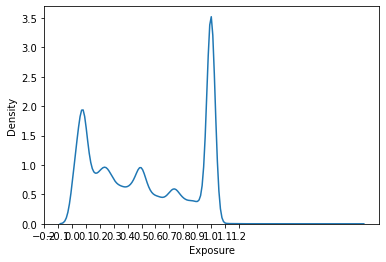

In [ ]:
sns.kdeplot(train.Exposure)
plt.xticks(np.arange(-0.2,1.3,0.1))

In [ ]:
train.head()

,IDpol,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,target_regression,target_classification
0,1124750,0.74,C,5.0,10.0,50.0,50.0,B2,Regular,182.0,R82,0.0,0
1,516531,0.78,C,6.0,5.0,40.0,50.0,NaN,Diesel,262.0,R93,0.0,0
2,922566,1.00,E,4.0,12.0,33.0,50.0,B3,Diesel,3103.0,R82,0.0,0
3,335537,NaN,D,4.0,16.0,40.0,100.0,B2,Regular,1313.0,R24,0.0,0
4,1355191,0.34,B,7.0,7.0,42.0,156.0,B5,Regular,57.0,R24,0.0,0


In [ ]:
numeric = train.loc[:,train.dtypes == float].columns[:-1]
categorical = train.loc[:,train.dtypes == object].columns

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339006 entries, 0 to 339005
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   IDpol                  339006 non-null  int64  
 1   Exposure               305106 non-null  float64
 2   Area                   305106 non-null  object 
 3   VehPower               305106 non-null  float64
 4   VehAge                 305106 non-null  float64
 5   DrivAge                305106 non-null  float64
 6   BonusMalus             305106 non-null  float64
 7   VehBrand               305106 non-null  object 
 8   VehGas                 305106 non-null  object 
 9   Density                339006 non-null  float64
 10  Region                 339006 non-null  object 
 11  target_regression      339006 non-null  float64
 12  target_classification  339006 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 33.6+ MB


Так как в данных есть пропуски, то стоит обработать их. В вещественных признаках заменим на медиану, так как она больше устойчива к выбросам, а категориальные на наиболее представленный класс в признаке

In [ ]:
from collections import Counter
def imputer(data, numeric_columns, categorical_columns):
  data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
  most_common = np.array(list(map(lambda x: Counter(x).most_common(1), data[categorical_columns].values.T))).T[0][0]
  most_common = pd.Series(most_common,index=data[categorical_columns].columns)
  data[categorical_columns] = data[categorical_columns].fillna(most_common)
  return data

In [ ]:
train = imputer(train,numeric,categorical)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339006 entries, 0 to 339005
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   IDpol                  339006 non-null  int64  
 1   Exposure               339006 non-null  float64
 2   Area                   339006 non-null  object 
 3   VehPower               339006 non-null  float64
 4   VehAge                 339006 non-null  float64
 5   DrivAge                339006 non-null  float64
 6   BonusMalus             339006 non-null  float64
 7   VehBrand               339006 non-null  object 
 8   VehGas                 339006 non-null  object 
 9   Density                339006 non-null  float64
 10  Region                 339006 non-null  object 
 11  target_regression      339006 non-null  float64
 12  target_classification  339006 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 33.6+ MB


Построим ящик с усами, чтобы посмотреть, есть ли в данных выбросы. Заменим их на медианыные значения

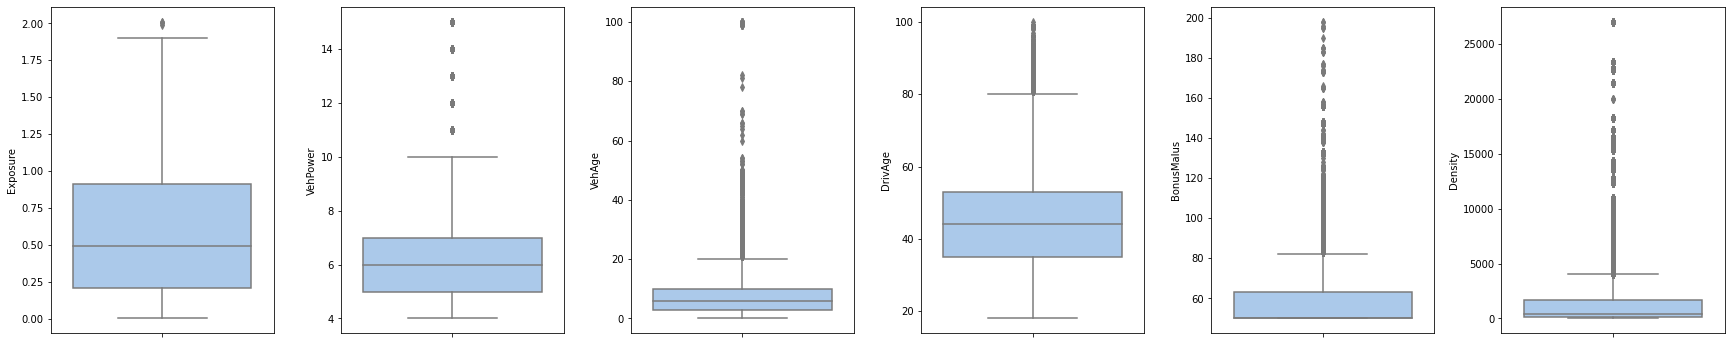

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6, figsize=(30,6))
plt.subplots_adjust(wspace=0.3, hspace=0)
for i,column in enumerate(train[numeric].columns):
  sns.boxplot(y = train[column], orient='v',ax=ax[i],palette="pastel", data = train)

In [ ]:
train.describe()

,IDpol,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,target_regression,target_classification
count,3.390060e+05,339006.000000,339006.000000,339006.000000,339006.000000,339006.000000,339006.000000,3.390060e+05,339006.000000
mean,1.019124e+06,0.524352,6.409069,6.948567,45.333357,58.799709,1787.988977,8.090232e+01,0.050235
std,5.883838e+05,0.345643,1.947610,5.389452,13.419513,15.150538,3940.876176,3.011104e+03,0.218430
min,0.000000e+00,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000
25%,5.098405e+05,0.210000,5.000000,3.000000,35.000000,50.000000,92.000000,0.000000e+00,0.000000
50%,1.019928e+06,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000
75%,1.528736e+06,0.910000,7.000000,10.000000,53.000000,63.000000,1662.000000,0.000000e+00,0.000000
max,2.034037e+06,2.010000,15.000000,100.000000,100.000000,198.000000,27000.000000,1.404186e+06,1.000000


In [ ]:
def outliers(dataset):
  data = dataset.copy(deep = True)
  description = data.describe()
  max = description.iloc[-2,:]+2*description.iloc[2,:]
  min = description.iloc[3,:]-2*description.iloc[2,:]
  median = train[numeric].median()
  for i,column in enumerate(data):
    data[column][data[column]>max[i]] = median[i]
    data[column][data[column]<min[i]] = median[i]
  return data

In [ ]:
train[numeric] = outliers(train[numeric])

# Конец класса

После замены выбросов можно видеть, что в некоторых признаков, где изначально был большой разброс данных с новым пересчетом медианы выбросы остались. Построим ящик с усами с повторным удалением выбросов.

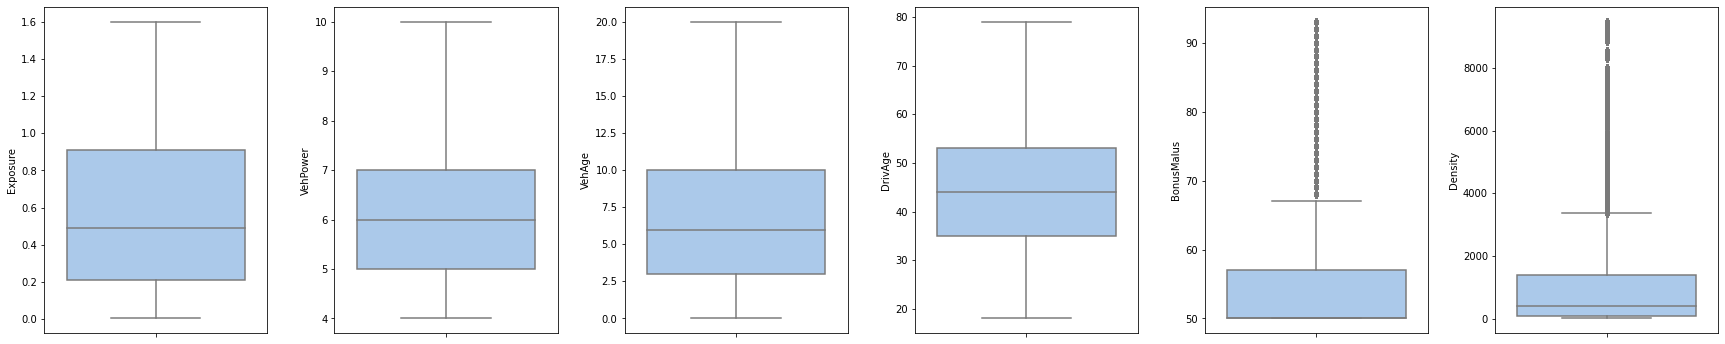

In [ ]:
fig, ax = plt.subplots(1,6, figsize=(30,6))
plt.subplots_adjust(wspace=0.3, hspace=0)
for i,column in enumerate(train[numeric].columns):
  sns.boxplot(y = train[column], orient='v',ax=ax[i],palette="pastel", data = train)

Так как после вторичногог удаления выбросов они остались при новом пересчете квартилей, я решила остановиться на первом варианте и не смещать распределение данных слишком сильно. 

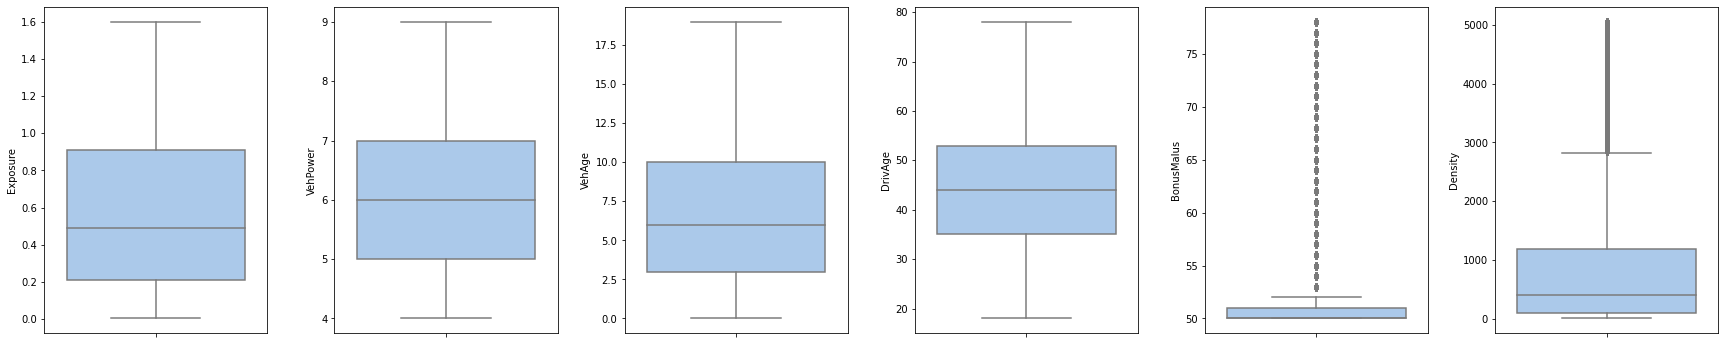

In [ ]:
subtrain = train.copy(deep = True)
# out = Outliers()
subtrain[numeric]= outliers(subtrain[numeric])
fig, ax = plt.subplots(1,6, figsize=(30,6))
plt.subplots_adjust(wspace=0.3, hspace=0)
for i,column in enumerate(subtrain[numeric].columns):
  sns.boxplot(y = subtrain[column], orient='v',ax=ax[i],palette="pastel", data = subtrain)

Так как IDpol - уникальный идентификатор, то его можно удалить

In [ ]:
len(train.iloc[:,0].unique()) == len(train.iloc[:,0])

True

In [ ]:
train = train.drop(train.columns[0],axis = 1)

In [ ]:
y_classification = train['target_classification']
y_regression = train ['target_regression']
X = train.drop(columns= ['target_regression',	'target_classification'])

# EDA 
Посмотрим на распределение тренировочных и тестовых данных, чтобы можно было быть уверенным, что мы можем равнозначно учитывать признаки при построении модели, что применение модели на тестовых данных будет предсказуемым.

 Данные на тренировочной выборке немного смещенно, так как они очищены от выбросов. Можно быть почти уверенным, что предсказание на тесте будет близким к предсказанию на валидационной выборке

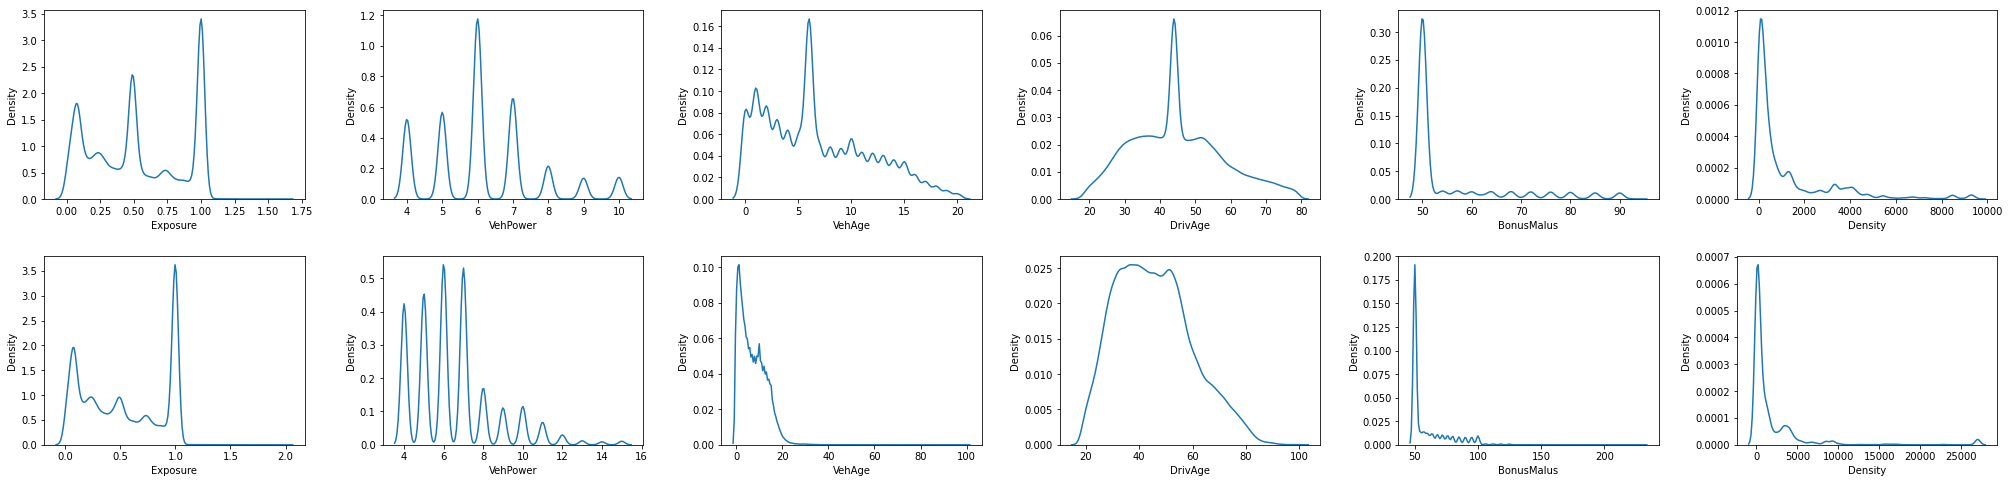

In [ ]:
fig, ax = plt.subplots(2,6,figsize=(35,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i,column in enumerate(numeric):
  sns.kdeplot(train.loc[:,column], ax = ax[0][i])
  sns.kdeplot(test.loc[:,column], ax = ax[1][i])

По каждой из категориальных переменных можно видеть одинаковое распределение по классам, то есть ни одна из категориальных переменных сильно не коррелирует с целевой переменной

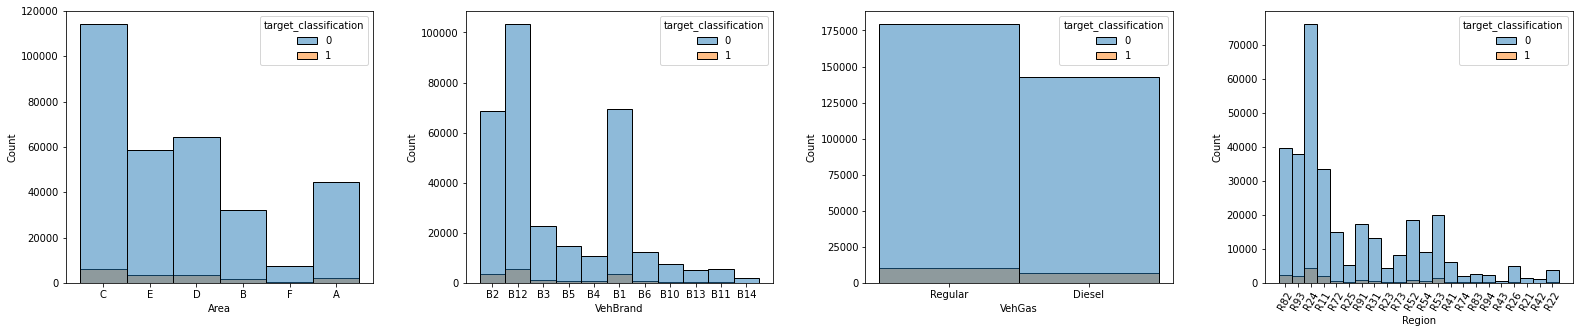

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(27,5))
plt.subplots_adjust(wspace=0.3, hspace=0)
for i in range(4):
  sns.histplot(x=train[categorical].iloc[:,i], hue='target_classification', data=train, ax = ax[i])
  ax[3].set_xticklabels(train['Region'].unique(),rotation=60)

Видно, что значительной корреляции признаков между собой и с целевой переменной нет, поэтому на этом этапе ни один из признаков удалить нельзя.

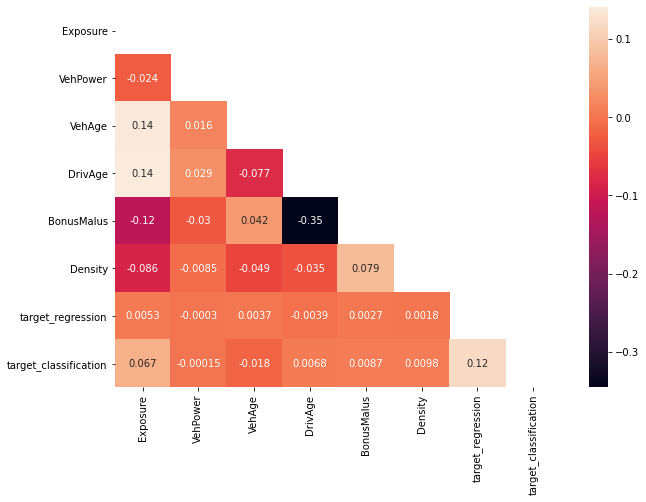

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(train.corr(),annot = True,mask=np.triu(train.corr()),)

# Генерация и отбор признаков

Здесь проверяется гипотеза, существует ли какая-либо зависимость пар признаков от целевой переменной классификации. Апсемплинг делается для того, чтобы доля 1-го класса на графике была заметной. График строится таким образом, что при формировании групп объектов, которые преимущественно какого-то класса, происходит их графическое разделение, как на картинке здесь: https://seaborn.pydata.org/_images/histplot_41_0.png

Так как этого разделения не произошло, в документации это объясняется тем, что объекты по сгруппированному  признаку слишком смешаны, из чего следует вывод, что преобладание объектов с комбинацией каких-либо двух признаков в каком-то конкретном классе не наблюдается

In [ ]:
uped = train[train['target_classification']==1]
for i in range(35):  
  length = len(train[train['target_classification']==1])
  rand = np.random.choice(length,size = int(length/2))
  uped = pd.concat([train[train['target_classification']==1].reset_index().iloc[rand,:],uped])
upsampled = pd.concat([uped, train])

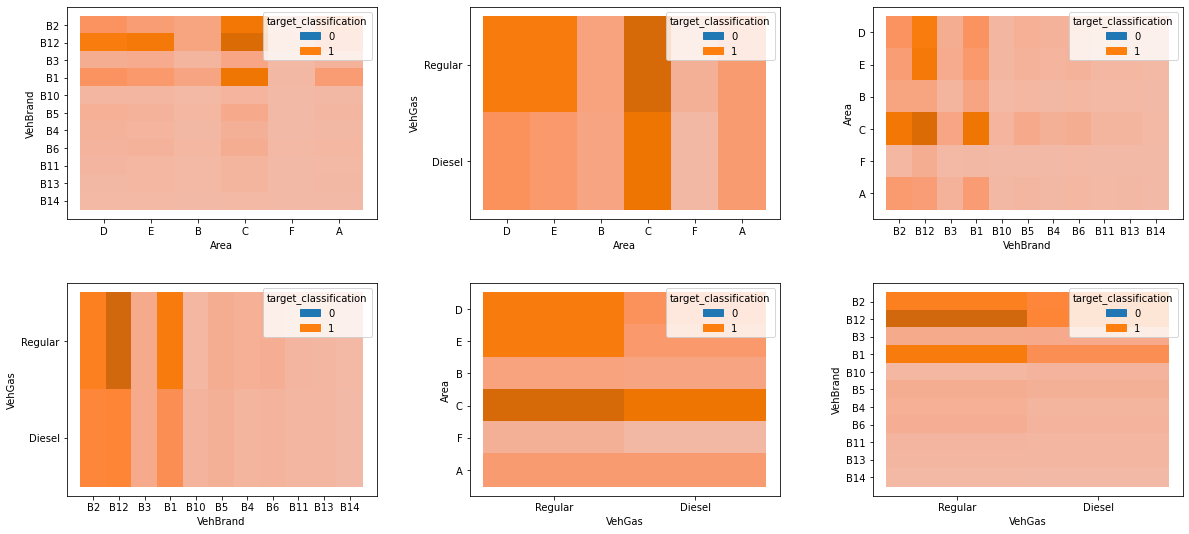

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
k = 0
for i in range(3):
  for j in range(3):
    if i == j:
      continue
    sns.histplot(x=upsampled[categorical].iloc[:,i],y=upsampled[categorical].iloc[:,j], data=upsampled, ax=ax[k//3][k%3], hue = 'target_classification')
    k+=1

Распределение в апсемплированных данных каждого признака по целевой переменной тоже схоже

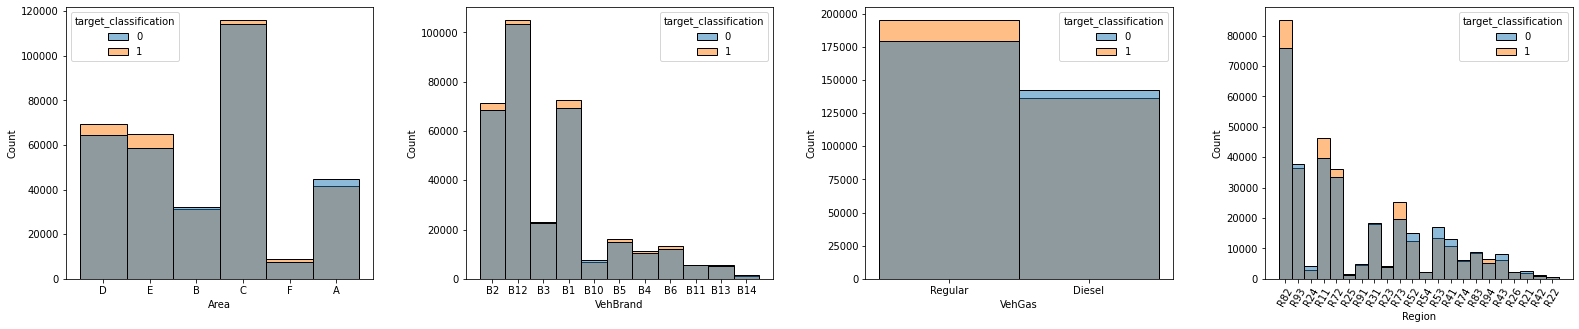

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(27,5))
plt.subplots_adjust(wspace=0.3, hspace=0)
for i in range(4):
  sns.histplot(x=upsampled[categorical].iloc[:,i], hue='target_classification', data=upsampled, ax = ax[i])
  ax[3].set_xticklabels(train['Region'].unique(),rotation=60)

Так как у признака Exposure слишком маленькая дисперсия, его распределение близко к константному, значит он почти не влияет на трагет, поэтому его можно удалить. Однако прлогарифмировав признак можно получить дисперсию, сравнимую с дисперсией других признаков 

In [ ]:
print(np.var(train[numeric]+0.00001), np.var(np.log(train[numeric]+0.00001)),sep = '\n\n')

Exposure      1.193889e-01
VehPower      2.222721e+00
VehAge        2.440184e+01
DrivAge       1.645253e+02
BonusMalus    1.128391e+02
Density       3.402557e+06
dtype: float64

Exposure       1.231639
VehPower       0.057660
VehAge        13.010836
DrivAge        0.087421
BonusMalus     0.027644
Density        3.054709
dtype: float64


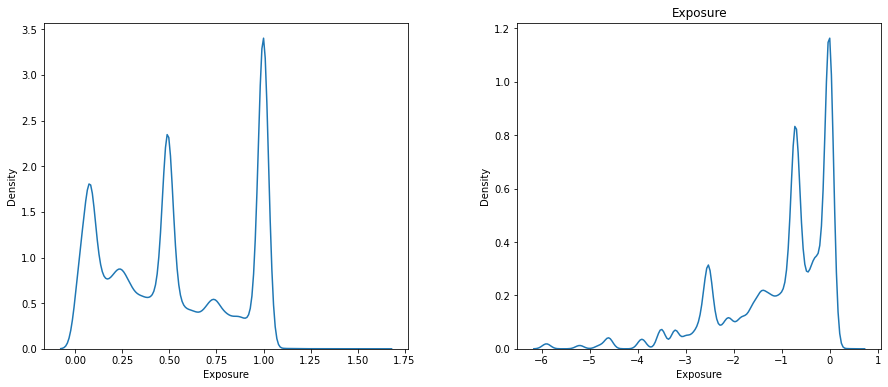

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i,x in enumerate([train.Exposure,np.log(train.Exposure)]):  
  sns.kdeplot(x,ax=ax[i])
ax[1] = plt.title('log(Exposure)')
ax[0] = plt.title('Exposure')

В данных есть признаки VehAge и DrivAge, которые показывают возраст водителя и автомобиля. Есть смысл возрастные переменные перекодировать в промежутки (20-30; 30-40..), однако это будет сделано после разделения выборки на тренировочную и тестовую 

# Преобразование данных

Класс для обработки выбросов, чтобы была возможность вставить его в pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR, LinearSVR
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# uped = train[train['target_classification']==1]
# for i in range(35):  
#   length = len(train[train['target_classification']==1])
#   rand = np.random.choice(length,size = int(length/2))
#   uped = pd.concat([train[train['target_classification']==1].reset_index().iloc[rand,:],uped])
# upsampled = pd.concat([uped, train])

In [ ]:
# y_classification_upsampled = upsampled.target_classification
# y_regression_upsampled = upsampled.target_classification
# upsampled = upsampled.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(upsampled, y_classification_upsampled, test_size = 0.2, random_state=42)

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X, y_regression, test_size = 0.2, random_state=42)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train, y_classification, test_size = 0.2, random_state=42,stratify = train.target_classification)

In [ ]:
uped = train[train['target_classification']==1]
for i in range(38):  
  length = len(X_train[X_train['target_classification']==1])
  rand = np.random.choice(length,size = int(length/2))
  uped = pd.concat([X_train[X_train['target_classification']==1].reset_index().iloc[rand,:],uped])
upsampled = pd.concat([uped, X_train])

In [ ]:
y_train= upsampled.target_classification
y_regression_upsampled = upsampled.target_regression
X_train = upsampled.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

In [ ]:
y_train.value_counts()

1    289510
0    257580
Name: target_classification, dtype: int64

## Полный pipeline

In [ ]:
class Outliers:

  def __init__(
        self): 
    self.max = 0
    self.min = 0
    self.median = 0

  def fit(self,dataset,y=None):
    data = dataset.copy(deep = True)
    description = data.describe()
    self.max = description.iloc[-2,:]+2*description.iloc[2,:]
    self.min = description.iloc[3,:]-2*description.iloc[2,:]
    self.median = train[numeric].median()

  def transform(self,dataset,y=None):  
    data = dataset.copy(deep = True)
    for i,column in enumerate(data):
      data[column][data[column]>self.max[i]] = self.median[i]
      data[column][data[column]<self.min[i]] = self.median[i]
    return data

  def fit_transform(self,dataset,y=None):
    data = pd.DataFrame(dataset.copy())
    description = data.describe()
    self.max = description.iloc[-2,:]+2*description.iloc[2,:]
    self.min = description.iloc[3,:]-2*description.iloc[2,:]
    self.median = train[numeric].median()
    for i,column in enumerate(data):
      data[column][data[column]>self.max[i]] = self.median[i]
      data[column][data[column]<self.min[i]] = self.median[i]
    return data.values

In [ ]:
num = ['VehPower', 'BonusMalus', 'Density']

log_scale = Pipeline(steps=[
    ('log',FunctionTransformer(func=np.log)),
    ('scaler',StandardScaler())])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outliers', Outliers()),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical),
        ('ohe', OneHotEncoder(handle_unknown='ignore',sparse = False), categorical),
        ("kbin", KBinsDiscretizer(encode='onehot',n_bins = 9, strategy = 'kmeans'),['VehAge', 'DrivAge']),
        ("log_scale", log_scale,['Exposure']),          
        ('num', numeric_transformer, num),
        ], remainder='passthrough')
#,
 #       ('ohe', OHE, categorical)], remainder='passthrough')

ct=ColumnTransformer([('one_hot_encoder', OneHotEncoder(sparse=False),categorical)],   
    remainder='passthrough')


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVR())])

## Pipeline для обработанных данных

In [ ]:
num = ['VehPower', 'BonusMalus', 'Density', 'VehAge', 'DrivAge']

log_scale = Pipeline(steps=[
    ('log',FunctionTransformer(func=np.log)),
    ('scaler',StandardScaler())])

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore',sparse = False), categorical),
        ("log_scale", log_scale,['Exposure']), 
        ("kbin", KBinsDiscretizer(encode='onehot',n_bins = 9, strategy = 'kmeans'),['VehAge', 'DrivAge']),
        ('num', numeric_transformer, num),
        ], remainder='passthrough')


ct=ColumnTransformer([('one_hot_encoder', OneHotEncoder(sparse=False),categorical)],   
    remainder='passthrough')


clf = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
preprocessor.fit(X_train)

In [ ]:
X_train = preprocessor.transform(X_train)

In [ ]:
ohe_labels = preprocessor.transformers_[0][1].get_feature_names().tolist()
kbin_labels = [ str(i) + '_' + str(j) for i in ['VehAge', 'DrivAge'] for j in range(9)]
labels = ohe_labels+ ['Exposure'] + kbin_labels  + num

In [ ]:
X_train = pd.DataFrame(X_train, columns=labels)

# Классификация

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=300,
                           depth=7,
                           learning_rate=0.01,
                           loss_function='Logloss',
                           verbose=100, )

In [ ]:
model.fit(X_train, y_train)

0:	learn: 0.6926173	total: 159ms	remaining: 47.5s
100:	learn: 0.6675064	total: 13.8s	remaining: 27.2s
200:	learn: 0.6595945	total: 27.5s	remaining: 13.6s
299:	learn: 0.6558242	total: 41.2s	remaining: 0us


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
predictions = model.predict(preprocessor.transform(X_test))
roc_auc_score(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


0.5975235228865201

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(preprocessor.transform(X_test))
roc_auc_score(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


0.9924894991526484

In [ ]:
# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# predictions = rf.predict(preprocessor.transform(X_test))
# roc_auc_score(y_test,predictions)

params = {'n_estimators': np.arange(20,160,20),
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf':np.arange(5)}
# params = {'kernel_label' = ['RBF', 'Linear', 'Polynomial'],
#           'svrs' = [svr_rbf, svr_lin, svr_poly]
#           'epsilon'=[.1,0.01,0.001]
# 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
grid = GridSearchCV(RandomForestClassifier(random_state=42, oob_score = True), param_grid = params, cv = 5, verbose = 100, )

In [ ]:
grid.fit(X_train,y_train)
preds = grid.predict(preprocessor.transform(X_test))


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] criterion=gini, min_samples_leaf=0, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=20, score=nan, total=   0.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=20, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=20, score=nan, total=   0.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=20, score=nan, total=   0.2s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=20, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=40 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=40, score=nan, total=   0.2s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=40 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=40, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=40 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=40, score=nan, total=   0.2s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=40 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=40, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=40 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=40, score=nan, total=   0.2s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.7s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=60 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=60, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.0s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=60 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=60, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.3s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=60 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=60, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.5s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=60 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=60, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.8s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=60 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=60, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.1s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=80 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=80, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.4s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=80 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=80, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.6s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=80 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=80, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.9s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=80 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=80, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.2s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=80 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=80, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.5s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=100 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=100, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    5.8s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=100 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=100, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    6.1s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=100 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=100, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    6.4s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=100 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=100, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    6.6s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=100 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=100, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.9s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=120 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=120, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    7.2s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=120 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=120, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    7.5s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=120 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=120, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    7.8s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=120 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=120, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    8.1s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=120 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=120, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.4s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=140 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=140, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    8.7s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=140 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=140, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    9.0s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=140 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=140, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    9.3s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=140 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=140, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.6s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=0, n_estimators=140 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)


[CV]  criterion=gini, min_samples_leaf=0, n_estimators=140, score=nan, total=   0.3s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    9.9s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  criterion=gini, min_samples_leaf=1, n_estimators=20, score=0.996, total=  27.2s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   37.1s remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  criterion=gini, min_samples_leaf=1, n_estimators=20, score=0.996, total=  27.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  1.1min remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  criterion=gini, min_samples_leaf=1, n_estimators=20, score=0.996, total=  27.3s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  1.5min remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  criterion=gini, min_samples_leaf=1, n_estimators=20, score=0.995, total=  27.7s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  2.0min remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=20 .............


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  criterion=gini, min_samples_leaf=1, n_estimators=20, score=0.966, total=  26.9s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.4min remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=40 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=40, score=0.996, total=  53.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:  3.3min remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=40 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=40, score=0.996, total=  52.7s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  4.2min remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=40 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=40, score=0.996, total=  53.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  5.1min remaining:    0.0s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=40 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimato

In [ ]:
print('лучший скор: ', grid.best_score_, 'лучшие параметры: ' grid.best_params_)

In [ ]:
roc_auc_score(y_test,preds)

In [ ]:
# params = {'kernel': ['linear', 'poly', 'rbf','sigmoid'],
#           'C': [1,.1,0.01,0.001],
#           'epsilon': [.1,0.01,0.001]}

# grid = GridSearchCV(SVR(), param_grid = params, cv = 5, verbose = 100)
# grid.fit(X_train,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predictions = logreg.predict(preprocessor.transform(X_test))
roc_auc_score(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


0.5850011491214611

 # Классификация

In [ ]:
params = {'classifier__kernel': ['linear', 'poly', 'rbf','sigmoid'],
          'classifier__C': [1,.1,0.01,0.001],
          'classifier__epsilon': [.1,0.01,0.001]}
# params = {'kernel_label' = ['RBF', 'Linear', 'Polynomial'],
#           'svrs' = [svr_rbf, svr_lin, svr_poly]
#           'epsilon'=[.1,0.01,0.001]
# 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
grid = GridSearchCV(clf, param_grid = params, cv = 5, verbose = 100, )


In [ ]:
# s = SVR()

In [ ]:
# grid.fit(train.drop(columns= ['target_regression',	'target_classification']), train['target_regression'] )

In [ ]:
# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(sparse=False),categorical)],   
#     remainder='passthrough'   )
# preprocess_pipeline=Pipeline([('ohe',ct),('sc',StandardScaler())])
# log_reg_pipeline=Pipeline([('preprocess',preprocess_pipeline),('classifier',SVR())])

## 1.2 Кластеризация

1. кластеризовать заданный набор данных (*task2_train_v5.csv*). Предложить метрику и проверить качество.
2. получить предсказания (номер кластера), сохранить в файл с расширением *csv* и приложить к решению.

In [ ]:
pca = PCA(n_components=2)
res = pca.fit_transform(X_train)

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=100)
km.fit_transform(res)

In [ ]:
plt.scatter(res[:, 0], res[:, 1], c=km.labels_, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
k_means = KMeans(n_clusters = 2)
k_means = k_means.fit(X_train)
clusters = k_means.predict(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=km.labels_)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()